# Comprehensive Comparision

We do a comparative study and analysis of the following Machine Learning models-
- Fisher Linear Discriminant
- Linear Perceptron
- Naive Bayes
- Logistic Regression
- Artificial Neural Networks and,
- Support Vector Machines 

The models are imported from the sklearn libraries. The data is scaled using the preprocessing sklearn library, StandardScaler and a 7-fold cross validation is done for each model using the sklearn in built method cross_validate.

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

## Loading Data

In [319]:
df = pd.read_csv('dataset_comb.csv')
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


In [268]:
df['Class'].value_counts()

jasmine    9985
Gonen      8200
Name: Class, dtype: int64

In [269]:
df.values.shape

(18185, 12)

In [270]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [284]:
X = df.values[:,1:-1]
Y = df.values[:,-1]

In [272]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [346]:
average= {}
maxm= {}

## Fisher Linear Discriminant 

The Fisher Linear Discriminant Analysis is a classification technique that identifies the linear combination of features that characterizes or separates two or more classes. 
The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

We import the sklearn LinearDiscrminantAnalysis model.

In [348]:
#pipe = Pipeline([('scaler', MinMaxScaler()), ('fda', LinearDiscriminantAnalysis())]) #scaling not required
fda_scores = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(fda_scores['test_score'],fda_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

average['Fisher Discriminant']= np.average(fda_scores['test_score'])
maxm['Fisher Discriminant']=np.amax(fda_scores['test_score'])
print("\nAverage test accuracy= ",average['Fisher Discriminant'],"\n")

fda_prec = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,scoring='precision')
for i,score in enumerate(fda_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
fda_rec = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,scoring='recall')
for i,score in enumerate(fda_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.8598922247882987  Training Accuracy =  0.9910181561557708
Fold  2
Testing Accuracy =  0.9992301770592764  Training Accuracy =  0.9861422980689035
Fold  3
Testing Accuracy =  0.9996150885296382  Training Accuracy =  0.9851799576570219
Fold  4
Testing Accuracy =  0.9984603541185527  Training Accuracy =  0.9847950214922692
Fold  5
Testing Accuracy =  0.9980754426481909  Training Accuracy =  0.9840893051902226
Fold  6
Testing Accuracy =  0.993841416474211  Training Accuracy =  0.9841534612176814
Fold  7
Testing Accuracy =  0.9068155564112438  Training Accuracy =  0.9967282525019245

Average test accuracy=  0.9651328942899161 

Precision over fold  1  =  1.0
Precision over fold  2  =  0.9992992291520673
Precision over fold  3  =  0.9992997198879552
Precision over fold  4  =  0.9972027972027973
Precision over fold  5  =  0.9965059399021663
Precision over fold  6  =  0.9889042995839112
Precision over fold  7  =  0.854916067146283


Recall over fold  1  =  0.74491

## Linear Perceptron 

A Perceptron is a linear classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. It uses the Gradient Descent Algorithm to update the weights based on misclassified points on each iteration.

We import the sklearn Perceptron model.

In [349]:
pipeLP = Pipeline([('scaler', StandardScaler()), ('per', Perceptron())])  #or use MinMaxScaler
per_scores = cross_validate(pipeLP,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(per_scores['test_score'],per_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

average['Perceptron']=np.average(per_scores['test_score'])
maxm['Perceptron']=np.amax(per_scores['test_score'])
print("\nAverage test accuracy= ",average['Perceptron'],"\n")

per_prec = cross_validate(pipeLP,X,Y,cv=7,scoring='precision')
for i,score in enumerate(per_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
per_rec = cross_validate(pipeLP,X,Y,cv=7,scoring='recall')
for i,score in enumerate(per_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.5969976905311778  Training Accuracy =  0.9974337589016488
Fold  2
Testing Accuracy =  0.9992301770592764  Training Accuracy =  0.9769679861422981
Fold  3
Testing Accuracy =  0.9846035411855273  Training Accuracy =  0.9722845961378072
Fold  4
Testing Accuracy =  1.0  Training Accuracy =  0.9867197023160326
Fold  5
Testing Accuracy =  1.0  Training Accuracy =  0.9831911208057997
Fold  6
Testing Accuracy =  0.99153194765204  Training Accuracy =  0.9803040995701546
Fold  7
Testing Accuracy =  0.9306892568348094  Training Accuracy =  0.9961508852963818

Average test accuracy=  0.9290075161804044 

Precision over fold  1  =  1.0
Precision over fold  2  =  1.0
Precision over fold  3  =  0.9894142554693014
Precision over fold  4  =  1.0
Precision over fold  5  =  1.0
Precision over fold  6  =  0.9848066298342542
Precision over fold  7  =  0.887920298879203


Recall over fold  1  =  0.2662929222144359
Recall over fold  2  =  0.9985984583041345
Recall over fold  3  

## Naive Bayes 

Naive Bayes algorithms are a set of supervised statistical classification machine learning algorithms based on the Bayes probability theorem.

Bayes theorem states that:

$$P(A|B) = \frac{P(B/A) * P(A)}{P(B)}$$$$P(A|B) = \frac{P(B/A) * P(A)}{P(B/A) * P(A) + P(C/A) * P(A)}$$
An important assumption made by Bayes theorem is that the value of a particular feature is independent from the value of any other feature for a given the class.

We import the sklearn GaussianNB model.

In [350]:
pipeNB = Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())]) #scaling not required i think
nb_scores = cross_validate(pipeNB,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(nb_scores['test_score'],nb_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

average['Naive Bayes']=np.average(nb_scores['test_score'])
maxm['Naive Bayes']=np.amax(nb_scores['test_score'])
print("\nAverage test accuracy= ",average['Naive Bayes'],"\n")

nb_prec = cross_validate(pipeNB,X,Y,cv=7,scoring='precision')
for i,score in enumerate(nb_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
nb_rec = cross_validate(pipeNB,X,Y,cv=7,scoring='recall')
for i,score in enumerate(nb_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.8852963818321786  Training Accuracy =  0.9919163405401937
Fold  2
Testing Accuracy =  0.9969207082371054  Training Accuracy =  0.9819080002566241
Fold  3
Testing Accuracy =  0.9953810623556582  Training Accuracy =  0.9818438442291654
Fold  4
Testing Accuracy =  0.9957659738260201  Training Accuracy =  0.9813947520369539
Fold  5
Testing Accuracy =  0.9907621247113164  Training Accuracy =  0.9815230640918714
Fold  6
Testing Accuracy =  0.9872979214780601  Training Accuracy =  0.9814589080644126
Fold  7
Testing Accuracy =  0.9102810935695033  Training Accuracy =  0.9926225301513986

Average test accuracy=  0.9659578951442631 

Precision over fold  1  =  1.0
Precision over fold  2  =  0.9944250871080139
Precision over fold  3  =  0.9916608756080612
Precision over fold  4  =  0.9923451635351427
Precision over fold  5  =  0.983448275862069
Precision over fold  6  =  0.9773817683344757
Precision over fold  7  =  0.8595539481615431


Recall over fold  1  =  0.7911

## Logistic Regression 

Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

We import the sklearn LogisticRegression model.

In [351]:
pipeLR = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(solver='liblinear'))])
lr_scores = cross_validate(pipeLR,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(lr_scores['test_score'],lr_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

average['Logistic Regression']=np.average(lr_scores['test_score'])
maxm['Logistic Regression']=np.amax(lr_scores['test_score'])
print("\nAverage test accuracy= ",average['Logistic Regression'],"\n")

lr_prec = cross_validate(pipeLR,X,Y,cv=7,scoring='precision')
for i,score in enumerate(lr_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
lr_rec = cross_validate(pipeLR,X,Y,cv=7,scoring='recall')
for i,score in enumerate(lr_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.7063125481139338  Training Accuracy =  0.9969205106819786
Fold  2
Testing Accuracy =  0.9988452655889145  Training Accuracy =  0.9871046384807852
Fold  3
Testing Accuracy =  1.0  Training Accuracy =  0.9872971065631616
Fold  4
Testing Accuracy =  1.0  Training Accuracy =  0.9874254186180792
Fold  5
Testing Accuracy =  0.9996150885296382  Training Accuracy =  0.9875537306729967
Fold  6
Testing Accuracy =  0.9965357967667436  Training Accuracy =  0.9878745108102907
Fold  7
Testing Accuracy =  0.9287639584135541  Training Accuracy =  0.9960225814729279

Average test accuracy=  0.9471532367732548 

Precision over fold  1  =  1.0
Precision over fold  2  =  0.9992987377279102
Precision over fold  3  =  1.0
Precision over fold  4  =  1.0
Precision over fold  5  =  0.9992992291520673
Precision over fold  6  =  0.9937282229965156
Precision over fold  7  =  0.8851644941030415


Recall over fold  1  =  0.4653118430273301
Recall over fold  2  =  0.9985984583041345
Rec

## Artificial Neural Network 

Artificial neural network is a machine learning technique used for classification problems. ANN is a set of connected input output network in which weight is associated with each connection. It consists of one input layer, one or more intermediate layer and one output layer.
A Multi Layer Perceptron is a supervised learning technique with a feed forward artificial neural network through back-propagation that can classify non-linearly separable data.

We import the sklearn MLPClassifier model.

In [352]:
pipeNN = Pipeline([('scaler', StandardScaler()), ('ann', MLPClassifier())])
nn_scores = cross_validate(pipeNN,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(nn_scores['test_score'],nn_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

average['Neural Network']=np.average(nn_scores['test_score'])
maxm['Neural Network']=np.amax(nn_scores['test_score'])
print("\nAverage test accuracy= ",np.average(nn_scores['test_score']),"\n")

nn_prec = cross_validate(pipeNN,X,Y,cv=7,scoring='precision')
for i,score in enumerate(nn_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
nn_rec = cross_validate(pipeNN,X,Y,cv=7,scoring='recall')
for i,score in enumerate(nn_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.6200923787528868  Training Accuracy =  0.9976903830114839
Fold  2
Testing Accuracy =  0.9984603541185527  Training Accuracy =  0.9890293193045486
Fold  3
Testing Accuracy =  0.9992301770592764  Training Accuracy =  0.9887085391672548
Fold  4
Testing Accuracy =  0.9988452655889145  Training Accuracy =  0.9891576313594662
Fold  5
Testing Accuracy =  0.9992301770592764  Training Accuracy =  0.989221787386925
Fold  6
Testing Accuracy =  0.9961508852963818  Training Accuracy =  0.9892859434143838
Fold  7
Testing Accuracy =  0.8656141701963804  Training Accuracy =  0.9983320502950987

Average test accuracy=  0.925374772581667 

Precision over fold  1  =  1.0
Precision over fold  2  =  0.9979020979020979
Precision over fold  3  =  0.9992997198879552
Precision over fold  4  =  0.9992992291520673
Precision over fold  5  =  0.9985994397759104
Precision over fold  6  =  0.9958100558659218
Precision over fold  7  =  0.8111490329920364


Recall over fold  1  =  0.33917

## Support Vector Machine 

Support vector machines (SVMs) are a set of supervised learning methods used for classification. They are efective forigh dimensional spaces and cases where number of dimensions is greater than the number of samples.

We import the sklearn svm.SVC model.

In [353]:
pipesvm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='rbf'))])  #kernel can linear or rbf or...  rbf gives highest acc
svm_scores = cross_validate(pipesvm,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(svm_scores['test_score'],svm_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)
    
average['SVM']=np.average(svm_scores['test_score'])
maxm['SVM']=np.amax(svm_scores['test_score'])
print("\nAverage test accuracy= ",average['SVM'],"\n")

svm_prec = cross_validate(pipesvm,X,Y,cv=7,scoring='precision')
for i,score in enumerate(svm_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
svm_rec = cross_validate(pipesvm,X,Y,cv=7,scoring='recall')
for i,score in enumerate(svm_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.7802155504234026  Training Accuracy =  0.996792198627061
Fold  2
Testing Accuracy =  1.0  Training Accuracy =  0.9889010072496311
Fold  3
Testing Accuracy =  0.9996150885296382  Training Accuracy =  0.9889010072496311
Fold  4
Testing Accuracy =  0.9992301770592764  Training Accuracy =  0.989221787386925
Fold  5
Testing Accuracy =  0.9996150885296382  Training Accuracy =  0.9890934753320074
Fold  6
Testing Accuracy =  0.9976905311778291  Training Accuracy =  0.9891576313594662
Fold  7
Testing Accuracy =  0.8860223334616866  Training Accuracy =  0.9974980754426482

Average test accuracy=  0.9517698241687816 

Precision over fold  1  =  0.9314516129032258
Precision over fold  2  =  1.0
Precision over fold  3  =  0.9992997198879552
Precision over fold  4  =  0.9985994397759104
Precision over fold  5  =  0.9992992291520673
Precision over fold  6  =  0.9958100558659218
Precision over fold  7  =  0.8281068524970964


Recall over fold  1  =  0.6475122634898388
Rec

## Boxplots of Testing Accuracies

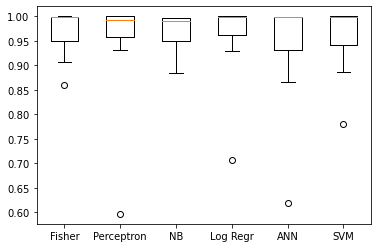

In [364]:
fig, ax = plot.subplots()
ax.boxplot([fda_scores['test_score'],per_scores['test_score'],nb_scores['test_score'],lr_scores['test_score'],nn_scores['test_score'],svm_scores['test_score']])
ax.set_xticklabels(['Fisher','Perceptron','NB','Log Regr','ANN','SVM'])
#plot.ylim([0.92,1.01])
plot.show()


## Boxplots of Training Accuracies 

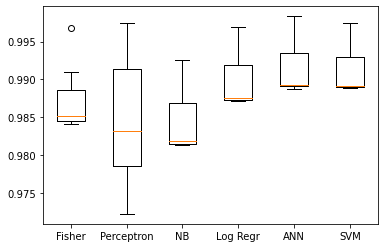

In [355]:
fig, ax = plot.subplots()
ax.boxplot([fda_scores['train_score'],per_scores['train_score'],nb_scores['train_score'],lr_scores['train_score'],nn_scores['train_score'],svm_scores['train_score']])
ax.set_xticklabels(['Fisher','Perceptron','NB','Log Regr','ANN','SVM'])
plot.show()

## Conclusions 

The average test accuracy over the 7 folds for each classification model shows Naive Bayes having the highest accuracy, and ANN having the least. 

In [359]:
df2 = pd.DataFrame(list(average.items()),columns = ['Model','Average Testing Accuracy']) 
df2

,Model,Average Testing Accuracy
0,Fisher Discriminant,0.965133
1,Perceptron,0.929008
2,Naive Bayes,0.965958
3,Logistic Regression,0.947153
4,Neural Network,0.925375
5,SVM,0.951770


The maximum test accuracy obtained in a fold for each classification model shows Perceptron, Logistic Regression and SVM having a 100% accuracy, and Naive Bayes having the least.

In [358]:
df2 = pd.DataFrame(list(maxm.items()),columns = ['Model','Maximum Testing Accuracy']) 
df2

,Model,Maximum Testing Accuracy
0,Fisher Discriminant,0.999615
1,Perceptron,1.000000
2,Naive Bayes,0.996921
3,Logistic Regression,1.000000
4,Neural Network,0.999230
5,SVM,1.000000


- The boxplots of the training accuracies show that ANN and SVM perform the best while training the datasets, while NB performs the worst.
- Linear Perceptron has the highest variance as shown by its boxplot. This could be due to the fact it makes random predictions of the weights while training.

- The boxplots of the testing accuracies show a near 100% median accuracy for all models. Median Accuracies for ANN, SVM and Logistic Regression are higher than the others'. 
- However due to presence of outliers from the first fold in all models the mean accuracy for NB turns out to be the highest.
- The high accuracy of Fisher LDA could indicate that the the data is in fact linearly seperable.